<a href="https://colab.research.google.com/github/ajisakti554/Analisis-Perancangan-dan-Survey-Semester-4-/blob/main/Project_analisis_survey_fasilitas_kampus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Menganalisa dataset hasil dari survey terkait dengan pengaruh fasilitas kampus terhadap efektifitas belajar mengajar di Universitas Koperasi Indonesia**

#  input data (input, filter(only fastek), dan drop (collumns age)

In [ ]:
import pandas as pd
import matplotlib as plt


In [ ]:
df=pd.read_csv('/content/data_olah - Form Responses 1 (1).csv')
df.head()

,Timestamp,No.,Nama,Jenis Kelamin,Angkatan,Program Studi,Usia,Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan,Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang,Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.,...,Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai,Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan,"Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar","Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen",Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai,"Karena Jendela Terbuka (Tanpa Gorden), Apakah dapat Memengaruhi Proses Belajar?, Jika Iya Jelaskan!",Apa Saran Anda Terkait Peningkatan Fasilitas Kampus untuk Mendukung Proses Belajar Mengajar?,"Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!","Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!",Fakultas
0,11/06/2025 11:50:43,1,Azzura kartika putri sagala,Wanita,2024,Agri Bisnis,NaN,2,3,1,...,4,3,2,5,5,Terkadang ia,Masih bannyak yanng harus di perbaki seperti w...,Iya wifinya sangat tidak lancar,"Kurang pencahayaan, perlu kipas/ac karna terka...",NaN
1,11/06/2025 11:52:27,2,Lea,Pria,2024,Agri Bisnis,NaN,2,2,2,...,3,2,2,2,2,Bisa karena jika menggunakan proyektor cahaya ...,Mungkin bisa dari kursi dan meja dibagusin dulu,ngelag,"panas, kursi dan meja goyang",NaN
2,11/06/2025 11:58:50,3,Yudha Prasetya Nugraha,Pria,2024,Sains Data,NaN,4,3,3,...,3,3,3,5,5,Tidak berpengaruh,Fasilitas harus merata pada setiap kelas,Aga sedikit susah masuk wifi dan koneksi tidak...,Pencahayaan pada setiap proyektor berbeda beda,NaN
3,11/06/2025 12:18:20,4,Yuda Bhirawa,Pria,2024,Sains Data,NaN,3,3,2,...,2,4,3,3,3,Mungkin boleh dipertimbangkan menggunakan gord...,Yah mungkin aspirasi dari kami bisa direalisas...,Untuk fasilitas Wi-Fi itu sebenarnya sudah bai...,Mungkin keluhan dari fasilitas ruang belajar p...,NaN
4,11/06/2025 12:20:13,5,Melani Ana Putri,Wanita,2024,Agri Bisnis,NaN,2,1,2,...,2,3,2,5,5,Iya karena terlalu banyak cahaya dari luar seh...,Sarannya agar terdapat gorden dikelas dan papa...,Terkadang wifi sulit diakses karena jaringan y...,"Jendela tidak ada gorden, lalu papan tulis yan...",NaN


In [ ]:
survey=df.drop(columns=['Usia'])


In [ ]:
survey['Program Studi'].value_counts()

,count
Program Studi,
Sains Data,10
Agri Bisnis,9
Manajemen,6
Teknologi Pangan,4


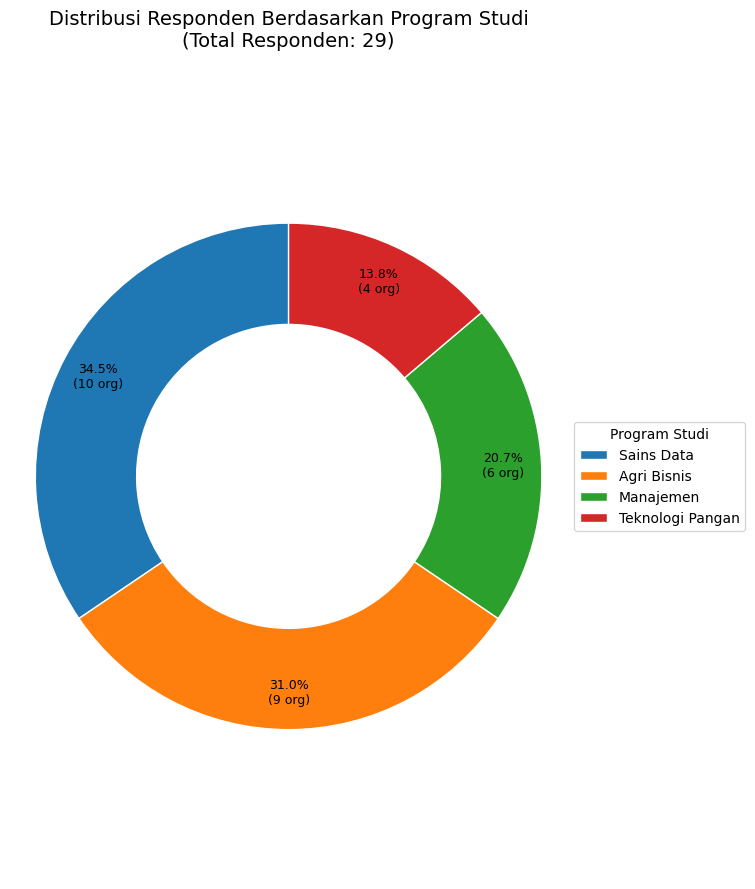

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Membuat DataFrame dari data Program Studi yang Anda berikan
data = {
    'Program Studi': ['Sains Data', 'Agri Bisnis', 'Manajemen', 'Teknologi Pangan'],
    'count': [10, 9, 6, 4]
}
df_prodi = pd.DataFrame(data)

# Judul visualisasi
title = 'Distribusi Responden Berdasarkan Program Studi'

total_responden = df_prodi['count'].sum() # Menghitung total responden

# Hitung persentase untuk setiap kategori
df_prodi['percentage'] = (df_prodi['count'] / total_responden) * 100

# 2. Persiapan untuk Visualisasi Pie Chart
# Urutkan data berdasarkan count dari tertinggi ke terendah untuk keterbacaan yang lebih baik pada pie chart
df_prodi_sorted = df_prodi.sort_values(by='count', ascending=False)

# Ambil data untuk plotting
labels = df_prodi_sorted['Program Studi']
sizes = df_prodi_sorted['percentage']
counts = df_prodi_sorted['count']

# Definisikan palet warna yang berbeda karena ini adalah kategori nominal (bukan skala Likert)
# Menggunakan colormap 'tab10' yang memiliki warna yang cukup berbeda
colors = plt.cm.tab10(np.arange(len(labels)))

# Fungsi kustom untuk autopct agar bisa menampilkan persentase dan jumlah responden
def custom_autopct_format(pct, all_counts_data):
    absolute_value = int(round(pct/100.*total_responden))
    if absolute_value > 0: # Hanya tampilkan label jika jumlahnya lebih dari 0
        return f'{pct:.1f}%\n({absolute_value} org)'
    return '' # Tidak menampilkan label jika jumlahnya 0

# 3. Membuat Plot Menggunakan Matplotlib Pie Chart
fig, ax = plt.subplots(figsize=(9, 9)) # Ukuran figure yang sesuai untuk pie chart

# Membuat pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    colors=colors,
    autopct=lambda pct: custom_autopct_format(pct, counts),
    pctdistance=0.85, # Posisi label persentase di dalam irisan
    startangle=90,    # Mulai irisan pertama dari atas
    wedgeprops=dict(width=0.4, edgecolor='w') # Properti untuk membuat donut chart (opsional)
)

# Sesuaikan warna teks persentase agar mudah dibaca di dalam irisan
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)

# Atur judul grafik
ax.set_title(f'{title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)

# Pastikan pie chart berbentuk lingkaran sempurna
ax.axis('equal') # Agar chart berbentuk lingkaran, bukan elips

# Tambahkan legend secara terpisah
# Label legend akan menjadi nama Program Studi
ax.legend(wedges, labels, title="Program Studi", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Sesuaikan layout agar semua elemen (termasuk legend) terlihat dengan baik
plt.tight_layout(rect=[0, 0, 0.85, 1]) # rect mengatur area plot agar menyisakan ruang di kanan untuk legend

# Tampilkan plot
plt.show()

In [ ]:
filter_only_fastek=survey[survey['Program Studi']!='Manajemen']
filter_only_fastek.head()

,Timestamp,No.,Nama,Jenis Kelamin,Angkatan,Program Studi,Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan,Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang,Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.,"Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning)",Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai,Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan,"Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar","Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen",Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai,"Karena Jendela Terbuka (Tanpa Gorden), Apakah dapat Memengaruhi Proses Belajar?, Jika Iya Jelaskan!",Apa Saran Anda Terkait Peningkatan Fasilitas Kampus untuk Mendukung Proses Belajar Mengajar?,"Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!","Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!",Fakultas
0,11/06/2025 11:50:43,1,Azzura kartika putri sagala,Wanita,2024,Agri Bisnis,2,3,1,3,4,3,2,5,5,Terkadang ia,Masih bannyak yanng harus di perbaki seperti w...,Iya wifinya sangat tidak lancar,"Kurang pencahayaan, perlu kipas/ac karna terka...",NaN
1,11/06/2025 11:52:27,2,Lea,Pria,2024,Agri Bisnis,2,2,2,2,3,2,2,2,2,Bisa karena jika menggunakan proyektor cahaya ...,Mungkin bisa dari kursi dan meja dibagusin dulu,ngelag,"panas, kursi dan meja goyang",NaN
2,11/06/2025 11:58:50,3,Yudha Prasetya Nugraha,Pria,2024,Sains Data,4,3,3,3,3,3,3,5,5,Tidak berpengaruh,Fasilitas harus merata pada setiap kelas,Aga sedikit susah masuk wifi dan koneksi tidak...,Pencahayaan pada setiap proyektor berbeda beda,NaN
3,11/06/2025 12:18:20,4,Yuda Bhirawa,Pria,2024,Sains Data,3,3,2,4,2,4,3,3,3,Mungkin boleh dipertimbangkan menggunakan gord...,Yah mungkin aspirasi dari kami bisa direalisas...,Untuk fasilitas Wi-Fi itu sebenarnya sudah bai...,Mungkin keluhan dari fasilitas ruang belajar p...,NaN
4,11/06/2025 12:20:13,5,Melani Ana Putri,Wanita,2024,Agri Bisnis,2,1,2,2,2,3,2,5,5,Iya karena terlalu banyak cahaya dari luar seh...,Sarannya agar terdapat gorden dikelas dan papa...,Terkadang wifi sulit diakses karena jaringan y...,"Jendela tidak ada gorden, lalu papan tulis yan...",NaN


# soal 1 : Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan

In [ ]:
filter_only_fastek['Program Studi'].value_counts()

,count
Program Studi,
Sains Data,10
Agri Bisnis,9
Teknologi Pangan,4


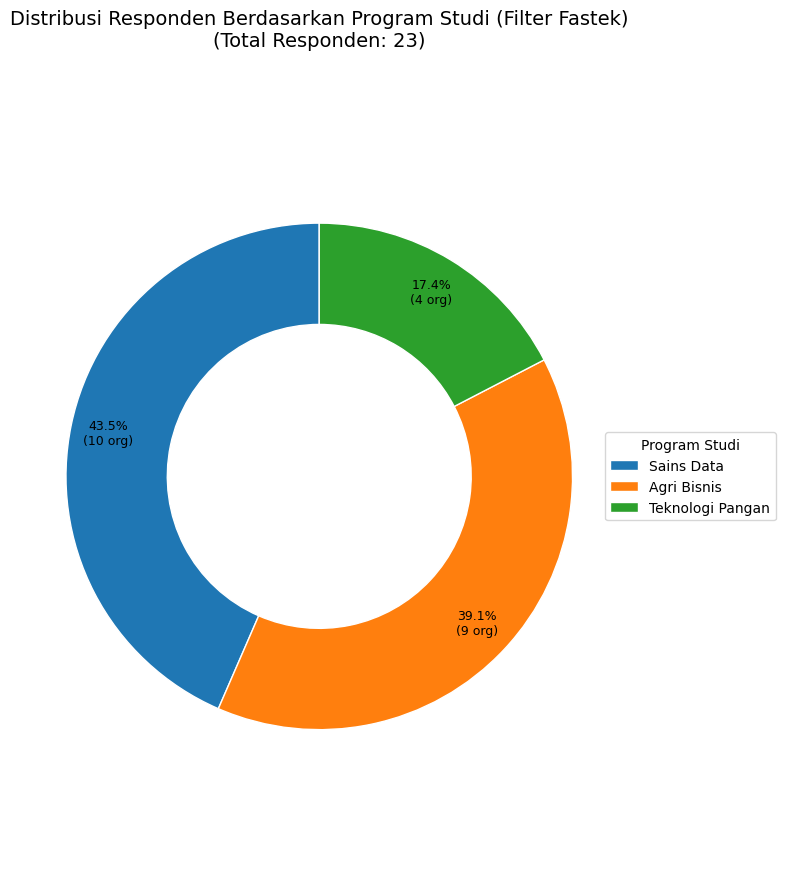

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Membuat DataFrame dari data Program Studi yang diberikan
data = {
    'Program Studi': ['Sains Data', 'Agri Bisnis', 'Teknologi Pangan'],
    'count': [10, 9, 4]
}
df_prodi_filtered = pd.DataFrame(data)

# Judul visualisasi
title = 'Distribusi Responden Berdasarkan Program Studi (Filter Fastek)'

total_responden = df_prodi_filtered['count'].sum()

# Hitung persentase untuk setiap kategori
df_prodi_filtered['percentage'] = (df_prodi_filtered['count'] / total_responden) * 100

# 2. Persiapan untuk Visualisasi Pie Chart
# Urutkan data berdasarkan count dari tertinggi ke terendah untuk keterbacaan yang lebih baik pada pie chart
df_prodi_sorted = df_prodi_filtered.sort_values(by='count', ascending=False)

# Ambil data untuk plotting
labels = df_prodi_sorted['Program Studi']
sizes = df_prodi_sorted['percentage']
counts = df_prodi_sorted['count']

# Definisikan palet warna untuk kategori nominal
colors = plt.cm.tab10(np.arange(len(labels))) # Menggunakan colormap 'tab10' untuk warna yang berbeda

# Fungsi kustom untuk autopct agar bisa menampilkan persentase dan jumlah responden
def custom_autopct_format(pct, all_counts_data):
    absolute_value = int(round(pct/100.*total_responden))
    if absolute_value > 0: # Hanya tampilkan label jika jumlahnya lebih dari 0
        return f'{pct:.1f}%\n({absolute_value} org)'
    return '' # Tidak menampilkan label jika jumlahnya 0

# 3. Membuat Plot Menggunakan Matplotlib Pie Chart
fig, ax = plt.subplots(figsize=(9, 9)) # Ukuran figure yang sesuai untuk pie chart

# Membuat pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    colors=colors,
    autopct=lambda pct: custom_autopct_format(pct, counts),
    pctdistance=0.85, # Posisi label persentase di dalam irisan
    startangle=90,    # Mulai irisan pertama dari atas
    wedgeprops=dict(width=0.4, edgecolor='w') # Properti untuk membuat donut chart (opsional)
)

# Sesuaikan warna teks persentase agar mudah dibaca di dalam irisan
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)

# Atur judul grafik
ax.set_title(f'{title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)

# Pastikan pie chart berbentuk lingkaran sempurna
ax.axis('equal') # Agar chart berbentuk lingkaran, bukan elips

# Tambahkan legend secara terpisah
# Label legend akan menjadi nama Program Studi
ax.legend(wedges, labels, title="Program Studi", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Sesuaikan layout agar semua elemen (termasuk legend) terlihat dengan baik
plt.tight_layout(rect=[0, 0, 0.85, 1]) # rect mengatur area plot agar menyisakan ruang di kanan untuk legend

# Tampilkan plot
plt.show()

In [ ]:
soal1=filter_only_fastek.iloc[:,[1,6]]
soal1

,No.,Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan
0,1,2
1,2,2
2,3,4
3,4,3
4,5,2
5,6,2
6,7,3
7,8,3
8,9,2
9,10,3


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal1['category']=pd.cut(soal1['Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan '],bins=bins_edge,include_lowest=True,labels=category)
soal1.head(30)

/tmp/ipython-input-9-2838156072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal1['category']=pd.cut(soal1['Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan '],bins=bins_edge,include_lowest=True,labels=category)


,No.,Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan,category
0,1,2,Tidak Setuju
1,2,2,Tidak Setuju
2,3,4,Setuju
3,4,3,Netral
4,5,2,Tidak Setuju
5,6,2,Tidak Setuju
6,7,3,Netral
7,8,3,Netral
8,9,2,Tidak Setuju
9,10,3,Netral


In [ ]:
grup=soal1.groupby('category')['Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan '].count()
grup.head()

/tmp/ipython-input-10-1384384665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup=soal1.groupby('category')['Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan '].count()


,Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan
category,
Sangat Tidak Setuju,2
Tidak Setuju,11
Netral,6
Setuju,4
Sangat Setuju,0


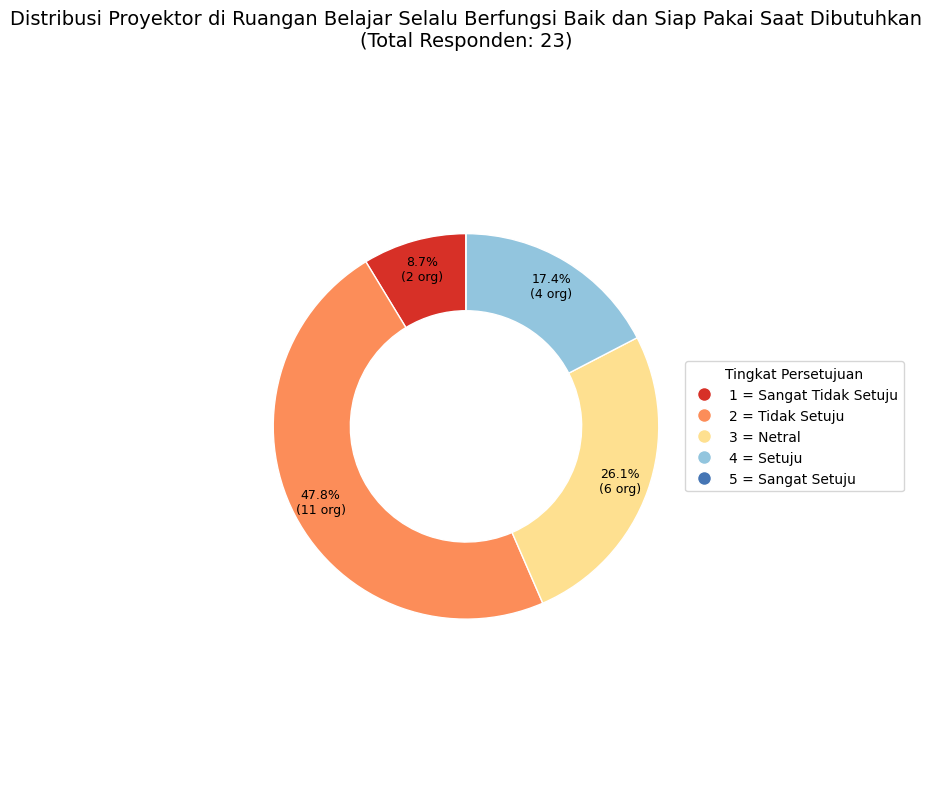

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup' sudah ada dan terisi seperti yang terlihat di gambar.
# Ini adalah struktur 'grup' yang diharapkan (pandas Series):
# category
# Sangat Tidak Setuju                                                                           2
# Tidak Setuju                                                                                 11
# Netral                                                                                        6
# Setuju                                                                                        4
# Sangat Setuju                                                                                 0
# Name: Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan, dtype: int64

# 1. Ekstrak data counts dari Series 'grup'
counts_series = grup # Menggunakan variabel 'grup' langsung

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Pie Chart
# Urutan kategori untuk pie chart (sesuai urutan logis dari tidak setuju ke setuju)
category_order = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna untuk setiap kategori
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori
pie_colors = [colors[cat] for cat in category_order]

# Definisikan label untuk setiap irisan pie (akan muncul di dalam pie)
# Label ini akan mencakup persentase dan jumlah responden
# Kita akan menggunakan f-string untuk memformat label dengan persentase dan jumlah responden
# dan mengecek jika persentase > 0 untuk menghindari label yang kosong atau ganjil
def custom_autopct_format(pct, allvals):
    absolute_value = int(round(pct/100.*total_responden))
    if absolute_value > 0:
        return f'{pct:.1f}%\n({absolute_value} org)'
    return '' # Tidak menampilkan label jika jumlah 0

# Definisikan label untuk legend (lebih detail dan mencakup skor)
legend_labels = {
    'Sangat Tidak Setuju': '1 = Sangat Tidak Setuju',
    'Tidak Setuju': '2 = Tidak Setuju',
    'Netral': '3 = Netral',
    'Setuju': '4 = Setuju',
    'Sangat Setuju': '5 = Sangat Setuju'
}

# 3. Membuat Plot Menggunakan Matplotlib Pie Chart
fig, ax = plt.subplots(figsize=(8, 8)) # Ukuran figure yang sesuai untuk pie chart

# Membuat pie chart
# autopct akan memanggil fungsi custom_autopct_format untuk setiap irisan
# pctdistance=0.85 untuk posisi persentase di dalam irisan
# startangle=90 untuk memulai irisan pertama dari atas (seringkali "Sangat Tidak Setuju" atau kategori pertama)
# wedgeprops untuk membuat donut chart (opsional, bisa dihapus jika ingin pie utuh)
wedges, texts, autotexts = ax.pie(
    percentages_ordered,
    colors=pie_colors,
    autopct=lambda pct: custom_autopct_format(pct, percentages_ordered),
    pctdistance=0.85,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w') # edgecolor untuk pemisah antar irisan
)

# Sesuaikan warna teks persentase agar mudah dibaca di dalam irisan
for autotext in autotexts:
    autotext.set_color('black') # Ubah warna teks persentase menjadi hitam (atau 'white' tergantung warna irisan)
    autotext.set_fontsize(9) # Atur ukuran font

# Atur judul grafik
ax.set_title(f'Distribusi Proyektor di Ruangan Belajar Selalu Berfungsi Baik dan Siap Pakai Saat Dibutuhkan\n(Total Responden: {total_responden})', fontsize=14, pad=20)

# Pastikan pie chart berbentuk lingkaran sempurna
ax.axis('equal') # Agar pie chart berbentuk lingkaran, bukan elips

# Tambahkan legend secara terpisah
# Kita akan membuat list handles dan labels secara manual untuk legend
# Hal ini penting untuk memastikan semua kategori muncul, termasuk yang nilainya 0 (seperti 'Sangat Setuju')
legend_handles = []
legend_labels_list = []
for cat_name in category_order:
    # Membuat objek 'dummy' untuk setiap entri legend
    # Ini adalah cara standar untuk membuat entri legend untuk item yang mungkin tidak digambar (misalnya nilai 0)
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[cat_name],
                                      markerfacecolor=colors[cat_name], markersize=10))
    legend_labels_list.append(legend_labels[cat_name])

# Tempatkan legend di luar plot agar tidak menutupi pie chart
ax.legend(handles=legend_handles, labels=legend_labels_list, loc='center left', bbox_to_anchor=(1, 0.5), title="Tingkat Persetujuan")

# Sesuaikan layout agar semua elemen (termasuk legend) terlihat dengan baik
plt.tight_layout(rect=[0, 0, 0.85, 1]) # rect mengatur area plot agar menyisakan ruang di kanan untuk legend

# Tampilkan plot
plt.show()

# soal 2 :Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang

In [ ]:
soal2=filter_only_fastek.iloc[:,[1,7]]
soal2

,No.,Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang
0,1,3
1,2,2
2,3,3
3,4,3
4,5,1
5,6,3
6,7,3
7,8,2
8,9,1
9,10,2


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal2['category']=pd.cut(soal2['Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang '],bins=bins_edge,include_lowest=True,labels=category)
soal2.head(30)

/tmp/ipython-input-13-673444984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal2['category']=pd.cut(soal2['Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang '],bins=bins_edge,include_lowest=True,labels=category)


,No.,Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang,category
0,1,3,Netral
1,2,2,Tidak Setuju
2,3,3,Netral
3,4,3,Netral
4,5,1,Sangat Tidak Setuju
5,6,3,Netral
6,7,3,Netral
7,8,2,Tidak Setuju
8,9,1,Sangat Tidak Setuju
9,10,2,Tidak Setuju


In [ ]:
grup2=soal2.groupby('category')['Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang '].count()
grup2.head()

/tmp/ipython-input-14-2490547071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup2=soal2.groupby('category')['Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang '].count()


,Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang
category,
Sangat Tidak Setuju,3
Tidak Setuju,8
Netral,7
Setuju,5
Sangat Setuju,0


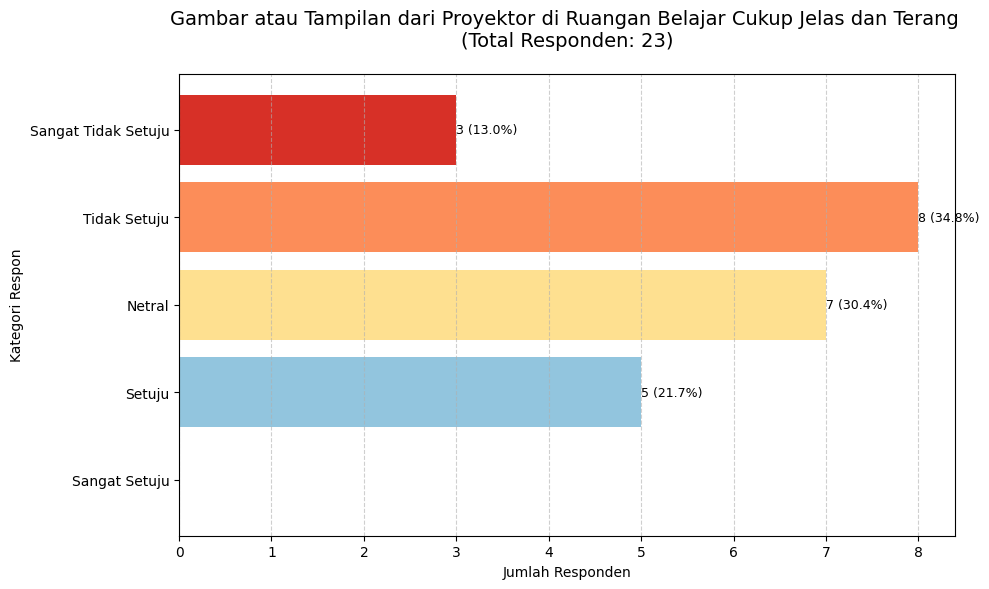

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup2' sudah ada dan terisi seperti yang terlihat di gambar.
# Ini adalah struktur 'grup2' yang diharapkan (pandas Series):
# category
# Sangat Tidak Setuju                                                                           3
# Tidak Setuju                                                                                  8
# Netral                                                                                        7
# Setuju                                                                                        5
# Sangat Setuju                                                                                 0
# Name: Gambar atau Tampilan dari Proyektor di Ruangan Belajar Cukup Jelas dan Terang, dtype: int64

# 1. Ekstrak data counts dari Series 'grup2'
counts_series = grup2 # Menggunakan variabel 'grup2' langsung

# Nama pertanyaan dari Series 'grup2'
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Horizontal Bar Chart
# Urutan kategori untuk plotting (dari Sangat Tidak Setuju ke Sangat Setuju atau sebaliknya)
# Untuk bar chart horizontal, biasanya kategori di sumbu Y. Urutan di list ini akan menentukan urutan bar.
# Mari kita urutkan dari skor 1 ke 5 agar sesuai dengan skala Likert.
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# **Definisikan warna yang SAMA dengan Pie Chart sebelumnya untuk konsistensi**
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat horizontal bar chart
# `y` adalah posisi kategori, `width` adalah panjang bar (count/persentase)
# `align='center'` menempatkan label kategori di tengah bar
bars = ax.barh(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di setiap bar
for bar in bars:
    width = bar.get_width() # Lebar bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (width / total_responden) * 100
    if width > 0: # Hanya tambahkan label jika count > 0
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{width} ({pct:.1f}%)',
                va='center', ha='left', fontsize=9, color='black')

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Jumlah Responden', fontsize=10)
ax.set_ylabel('Kategori Respon', fontsize=10)

# Invert Y-axis agar kategori pertama (Sangat Tidak Setuju) berada di atas
ax.invert_yaxis()

# Tambahkan grid horizontal (opsional)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

# soal 3 :Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.

In [ ]:
soal3=filter_only_fastek.iloc[:,[1,8]]
soal3

,No.,Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.
0,1,1
1,2,2
2,3,3
3,4,2
4,5,2
5,6,1
6,7,1
7,8,2
8,9,1
9,10,3


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal3['category']=pd.cut(soal3['Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan. '],bins=bins_edge,include_lowest=True,labels=category)
soal3.head(30)

/tmp/ipython-input-17-881477497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal3['category']=pd.cut(soal3['Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan. '],bins=bins_edge,include_lowest=True,labels=category)


,No.,Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.,category
0,1,1,Sangat Tidak Setuju
1,2,2,Tidak Setuju
2,3,3,Netral
3,4,2,Tidak Setuju
4,5,2,Tidak Setuju
5,6,1,Sangat Tidak Setuju
6,7,1,Sangat Tidak Setuju
7,8,2,Tidak Setuju
8,9,1,Sangat Tidak Setuju
9,10,3,Netral


In [ ]:
grup3=soal3.groupby('category')['Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan. '].count()
grup3.head()

/tmp/ipython-input-18-3411528530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup3=soal3.groupby('category')['Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan. '].count()


,Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.
category,
Sangat Tidak Setuju,11
Tidak Setuju,9
Netral,3
Setuju,0
Sangat Setuju,0


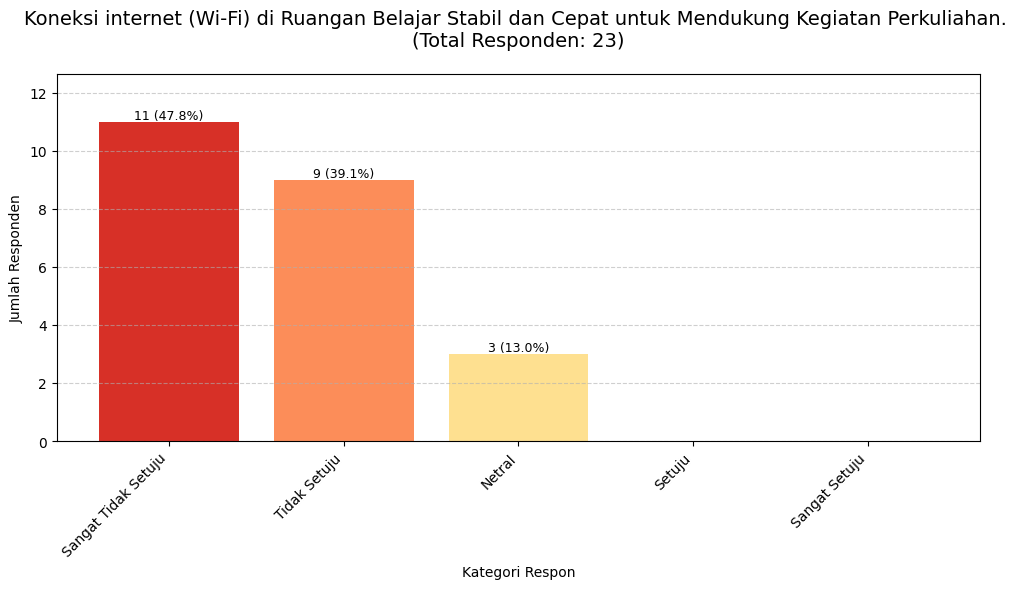

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup3' sudah ada dan terisi seperti yang terlihat di gambar.
# Contoh struktur grup3 (disimulasikan untuk kode ini jika tidak dijalankan bersamaan):
# grup3_data = {
#     'Sangat Tidak Setuju': 11,
#     'Tidak Setuju': 9,
#     'Netral': 3,
#     'Setuju': 0,
#     'Sangat Setuju': 0
# }
# grup3 = pd.Series(grup3_data, name='Koneksi internet (Wi-Fi) di Ruangan Belajar Stabil dan Cepat untuk Mendukung Kegiatan Perkuliahan.')
# grup3.index.name = 'category'
# Akhir dari bagian simulasi Series 'grup3'.

# 1. Ekstrak data counts dari Series 'grup3'
counts_series = grup3 # Menggunakan variabel 'grup3' langsung

# Nama pertanyaan dari Series 'grup3' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Bar Chart
# Urutan kategori untuk plotting di sumbu X
# Urutkan dari skor 1 ke 5 agar sesuai dengan skala Likert.
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# **Definisikan warna yang SAMA dengan visualisasi sebelumnya untuk konsistensi**
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Bar Chart (Vertikal)
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat bar chart vertikal
# `x` adalah posisi kategori, `height` adalah panjang bar (count)
bars = ax.bar(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di setiap bar
for bar in bars:
    height = bar.get_height() # Tinggi bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (height / total_responden) * 100
    if height > 0: # Hanya tambahkan label jika count > 0
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{int(height)} ({pct:.1f}%)', # Tampilkan count sebagai integer
                ha='center', va='bottom', fontsize=9, color='black',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', ec='b', lw=0, alpha=0.0)) # Opsional: background label

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Kategori Respon', fontsize=10)
ax.set_ylabel('Jumlah Responden', fontsize=10)

# Menyesuaikan rotasi label sumbu X jika terlalu panjang
plt.xticks(rotation=45, ha='right')

# Tambahkan grid horizontal (opsional)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu Y agar bar tidak terlalu mepet dengan atas grafik
ax.set_ylim(0, max(counts_ordered) * 1.15) # Tambah 15% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

# soal 4 : Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning)

In [ ]:
soal4=filter_only_fastek.iloc[:,[1,9]]
soal4

,No.,"Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning)"
0,1,3
1,2,2
2,3,3
3,4,4
4,5,2
5,6,1
6,7,3
7,8,2
8,9,2
9,10,2


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal4['category']=pd.cut(soal4['Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning) '],bins=bins_edge,include_lowest=True,labels=category)
soal4.head(30)

/tmp/ipython-input-21-4107787622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal4['category']=pd.cut(soal4['Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning) '],bins=bins_edge,include_lowest=True,labels=category)


,No.,"Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning)",category
0,1,3,Netral
1,2,2,Tidak Setuju
2,3,3,Netral
3,4,4,Setuju
4,5,2,Tidak Setuju
5,6,1,Sangat Tidak Setuju
6,7,3,Netral
7,8,2,Tidak Setuju
8,9,2,Tidak Setuju
9,10,2,Tidak Setuju


In [ ]:
grup4=soal4.groupby('category')['Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning) '].count()
grup4.head()

/tmp/ipython-input-22-4036443118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup4=soal4.groupby('category')['Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning) '].count()


,"Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning)"
category,
Sangat Tidak Setuju,7
Tidak Setuju,8
Netral,6
Setuju,2
Sangat Setuju,0


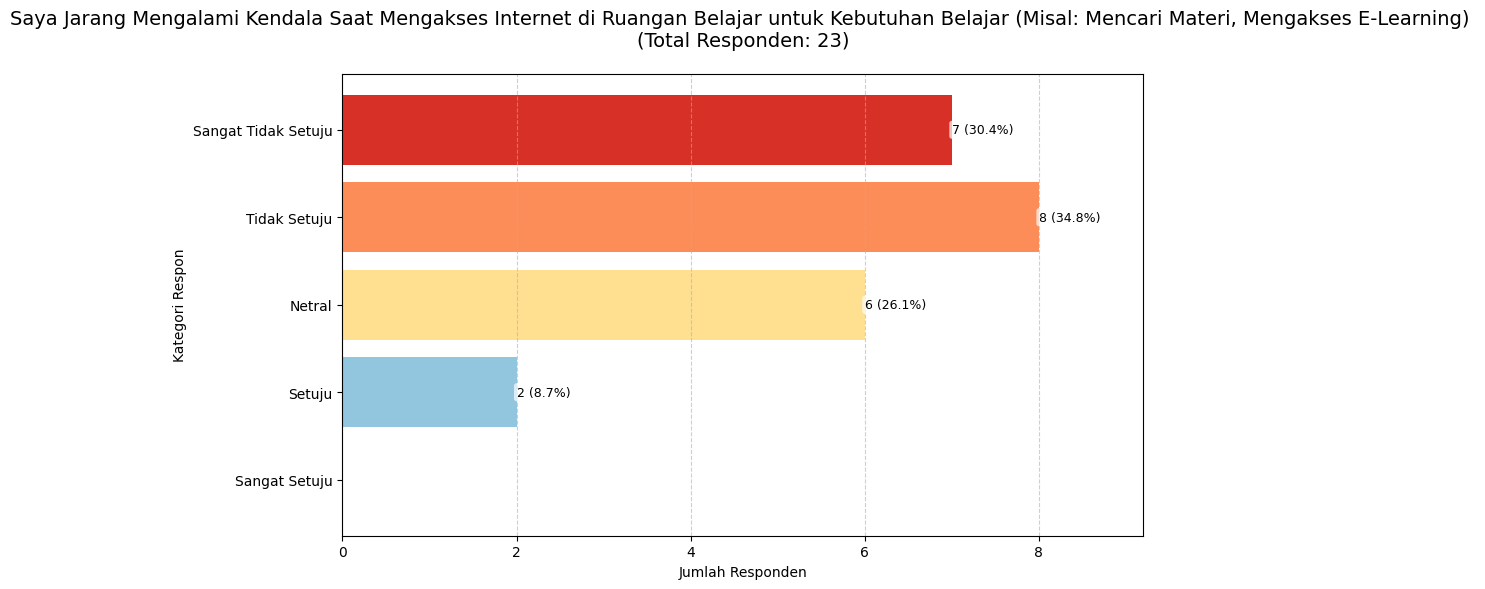

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup4' sudah ada dan terisi seperti yang terlihat di gambar.
# Ini adalah struktur 'grup4' yang diharapkan (pandas Series):
# category
# Sangat Tidak Setuju                                                                           7
# Tidak Setuju                                                                                  8
# Netral                                                                                        6
# Setuju                                                                                        2
# Sangat Setuju                                                                                 0
# Name: Saya Jarang Mengalami Kendala Saat Mengakses Internet di Ruangan Belajar untuk Kebutuhan Belajar (Misal: Mencari Materi, Mengakses E-Learning), dtype: int64

# 1. Ekstrak data counts dari Series 'grup4'
counts_series = grup4 # Menggunakan variabel 'grup4' langsung

# Nama pertanyaan dari Series 'grup4' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Horizontal Bar Chart
# Urutan kategori untuk plotting di sumbu Y (dari skor 1 ke 5)
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna yang KONSISTEN dengan visualisasi sebelumnya
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat horizontal bar chart
# `y` adalah posisi kategori, `width` adalah panjang bar (count)
# `align='center'` menempatkan label kategori di tengah bar
bars = ax.barh(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di setiap bar
for bar in bars:
    width = bar.get_width() # Lebar bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (width / total_responden) * 100
    if width > 0: # Hanya tambahkan label jika count > 0
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({pct:.1f}%)', # Tampilkan count sebagai integer
                va='center', ha='left', fontsize=9, color='black',
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Jumlah Responden', fontsize=10)
ax.set_ylabel('Kategori Respon', fontsize=10)

# Invert Y-axis agar kategori pertama (Sangat Tidak Setuju) berada di atas
ax.invert_yaxis()

# Tambahkan grid vertikal (opsional, karena bar horizontal)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu X agar label tidak terpotong
ax.set_xlim(0, max(counts_ordered) * 1.15) # Tambah 15% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

# soal 5 :Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai

In [ ]:
soal5=filter_only_fastek.iloc[:,[1,10]]
soal5

,No.,Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai
0,1,4
1,2,3
2,3,3
3,4,2
4,5,2
5,6,5
6,7,4
7,8,3
8,9,2
9,10,3


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal5['category']=pd.cut(soal5['Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai'],bins=bins_edge,include_lowest=True,labels=category)
soal5.head(30)

/tmp/ipython-input-25-108871218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal5['category']=pd.cut(soal5['Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai'],bins=bins_edge,include_lowest=True,labels=category)


,No.,Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai,category
0,1,4,Setuju
1,2,3,Netral
2,3,3,Netral
3,4,2,Tidak Setuju
4,5,2,Tidak Setuju
5,6,5,Sangat Setuju
6,7,4,Setuju
7,8,3,Netral
8,9,2,Tidak Setuju
9,10,3,Netral


In [ ]:
grup5=soal5.groupby('category')['Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai'].count()
grup5.head()

/tmp/ipython-input-26-2079133794.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup5=soal5.groupby('category')['Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai'].count()


,Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai
category,
Sangat Tidak Setuju,1
Tidak Setuju,8
Netral,7
Setuju,6
Sangat Setuju,1


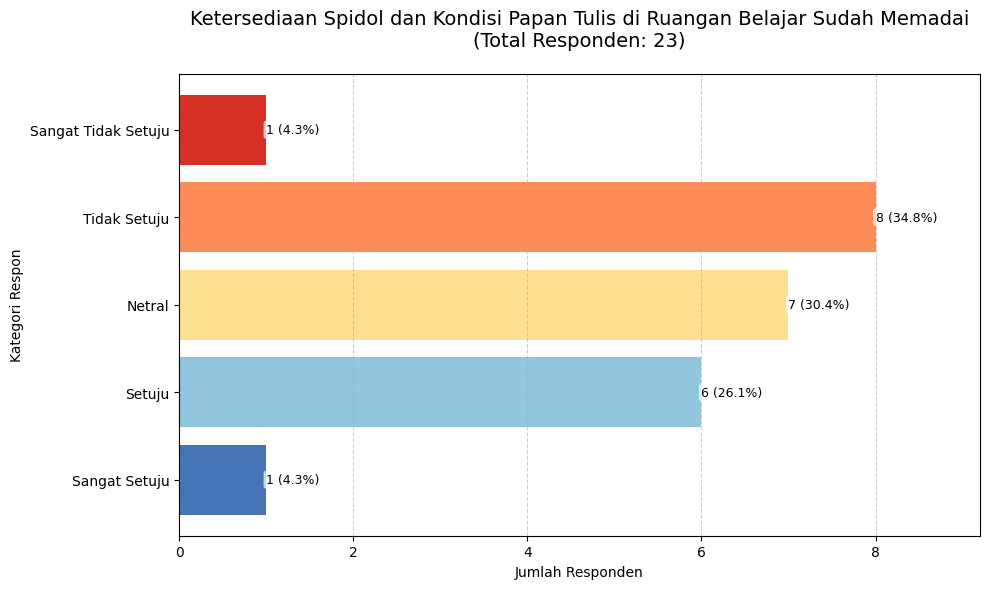

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup5' sudah ada dan terisi seperti yang terlihat di gambar.
# Contoh struktur grup5 (disimulasikan untuk kode ini jika tidak dijalankan bersamaan):
# grup5_data = {
#     'Sangat Tidak Setuju': 1,
#     'Tidak Setuju': 8,
#     'Netral': 7,
#     'Setuju': 6,
#     'Sangat Setuju': 1
# }
# grup5 = pd.Series(grup5_data, name='Ketersediaan Spidol dan Kondisi Papan Tulis di Ruangan Belajar Sudah Memadai')
# grup5.index.name = 'category'
# Akhir dari bagian simulasi Series 'grup5'.

# 1. Ekstrak data counts dari Series 'grup5'
counts_series = grup5 # Menggunakan variabel 'grup5' langsung

# Nama pertanyaan dari Series 'grup5' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Horizontal Bar Chart
# Urutan kategori untuk plotting di sumbu Y (dari skor 1 ke 5)
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna yang KONSISTEN dengan visualisasi sebelumnya
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat horizontal bar chart
# `y` adalah posisi kategori, `width` adalah panjang bar (count)
# `align='center'` menempatkan label kategori di tengah bar
bars = ax.barh(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di setiap bar
for bar in bars:
    width = bar.get_width() # Lebar bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (width / total_responden) * 100
    # Hanya tambahkan label jika count > 0, tetapi selalu tampilkan 0% jika memang 0
    label_text = f'{int(width)} ({pct:.1f}%)' if width > 0 else '0 (0.0%)'
    ax.text(width, bar.get_y() + bar.get_height()/2,
            label_text,
            va='center', ha='left', fontsize=9, color='black',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Jumlah Responden', fontsize=10)
ax.set_ylabel('Kategori Respon', fontsize=10)

# Invert Y-axis agar kategori pertama (Sangat Tidak Setuju) berada di atas
ax.invert_yaxis()

# Tambahkan grid vertikal (opsional, karena bar horizontal)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu X agar label tidak terpotong
ax.set_xlim(0, max(counts_ordered) * 1.15) # Tambah 15% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

#soal 6:Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan

In [ ]:
soal6=filter_only_fastek.iloc[:,[1,11]]
soal6

,No.,Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan
0,1,3
1,2,2
2,3,3
3,4,4
4,5,3
5,6,3
6,7,5
7,8,2
8,9,2
9,10,4


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal6['category']=pd.cut(soal6['Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan'],bins=bins_edge,include_lowest=True,labels=category)
soal6.head(30)

/tmp/ipython-input-29-1677454872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal6['category']=pd.cut(soal6['Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan'],bins=bins_edge,include_lowest=True,labels=category)


,No.,Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan,category
0,1,3,Netral
1,2,2,Tidak Setuju
2,3,3,Netral
3,4,4,Setuju
4,5,3,Netral
5,6,3,Netral
6,7,5,Sangat Setuju
7,8,2,Tidak Setuju
8,9,2,Tidak Setuju
9,10,4,Setuju


In [ ]:
grup6=soal6.groupby('category')['Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan'].count()
grup6.head()

/tmp/ipython-input-30-1263511063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup6=soal6.groupby('category')['Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan'].count()


,Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan
category,
Sangat Tidak Setuju,0
Tidak Setuju,6
Netral,10
Setuju,6
Sangat Setuju,1


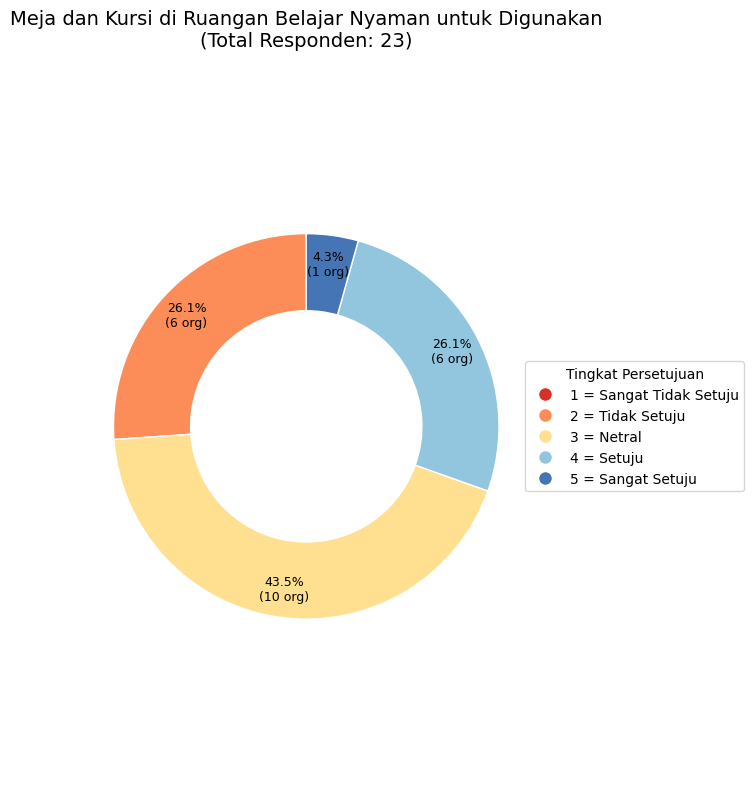

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup6' sudah ada dan terisi seperti yang terlihat di gambar.
# Contoh struktur grup6 (disimulasikan untuk kode ini jika tidak dijalankan bersamaan):
# grup6_data = {
#     'Sangat Tidak Setuju': 0,
#     'Tidak Setuju': 6,
#     'Netral': 10,
#     'Setuju': 6,
#     'Sangat Setuju': 1
# }
# grup6 = pd.Series(grup6_data, name='Meja dan Kursi di Ruangan Belajar Nyaman untuk Digunakan')
# grup6.index.name = 'category'
# Akhir dari bagian simulasi Series 'grup6'.

# 1. Ekstrak data counts dari Series 'grup6'
counts_series = grup6 # Menggunakan variabel 'grup6' langsung

# Nama pertanyaan dari Series 'grup6' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Pie Chart
# Urutan kategori untuk pie chart (sesuai urutan logis dari tidak setuju ke setuju)
category_order = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna yang KONSISTEN dengan visualisasi sebelumnya
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori
pie_colors = [colors[cat] for cat in category_order]

# Definisikan label untuk setiap irisan pie (akan muncul di dalam pie)
# Label ini akan mencakup persentase dan jumlah responden
# Fungsi kustom untuk autopct agar bisa menampilkan jumlah responden juga
def custom_autopct_format(pct, allvals):
    absolute_value = int(round(pct/100.*total_responden))
    if absolute_value > 0:
        return f'{pct:.1f}%\n({absolute_value} org)'
    return '' # Tidak menampilkan label di dalam irisan jika jumlahnya 0

# Definisikan label untuk legend (lebih detail dan mencakup skor)
legend_labels_map = {
    'Sangat Tidak Setuju': '1 = Sangat Tidak Setuju',
    'Tidak Setuju': '2 = Tidak Setuju',
    'Netral': '3 = Netral',
    'Setuju': '4 = Setuju',
    'Sangat Setuju': '5 = Sangat Setuju'
}

# 3. Membuat Plot Menggunakan Matplotlib Pie Chart
fig, ax = plt.subplots(figsize=(8, 8)) # Ukuran figure yang sesuai untuk pie chart

# Membuat pie chart
# autopct akan memanggil fungsi custom_autopct_format untuk setiap irisan
# pctdistance=0.85 untuk posisi persentase di dalam irisan
# startangle=90 untuk memulai irisan pertama dari atas
# wedgeprops untuk membuat donut chart (opsional, memberikan lubang di tengah)
wedges, texts, autotexts = ax.pie(
    percentages_ordered,
    colors=pie_colors,
    autopct=lambda pct: custom_autopct_format(pct, percentages_ordered),
    pctdistance=0.85,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w') # edgecolor untuk pemisah antar irisan
)

# Sesuaikan warna teks persentase agar mudah dibaca di dalam irisan
for autotext in autotexts:
    autotext.set_color('black') # Ubah warna teks persentase menjadi hitam
    autotext.set_fontsize(9) # Atur ukuran font

# Atur judul grafik
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)

# Pastikan pie chart berbentuk lingkaran sempurna
ax.axis('equal') # Agar pie chart berbentuk lingkaran, bukan elips

# Tambahkan legend secara terpisah
# Buat list handles dan labels secara manual untuk legend
# Hal ini penting untuk memastikan semua kategori muncul, termasuk yang nilainya 0
legend_handles = []
legend_labels_list = []
for cat_name in category_order:
    # Membuat objek 'dummy' untuk setiap entri legend (persegi kecil berwarna)
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor=colors[cat_name], markersize=10))
    legend_labels_list.append(legend_labels_map[cat_name])

# Tempatkan legend di luar plot agar tidak menutupi pie chart
ax.legend(handles=legend_handles, labels=legend_labels_list, loc='center left', bbox_to_anchor=(1, 0.5), title="Tingkat Persetujuan")

# Sesuaikan layout agar semua elemen (termasuk legend) terlihat dengan baik
plt.tight_layout(rect=[0, 0, 0.85, 1]) # rect mengatur area plot agar menyisakan ruang di kanan untuk legend

# Tampilkan plot
plt.show()

# soal 7 : Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar

In [ ]:
soal7=filter_only_fastek.iloc[:,[1,12]]
soal7

,No.,"Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar"
0,1,2
1,2,2
2,3,3
3,4,3
4,5,2
5,6,3
6,7,2
7,8,1
8,9,2
9,10,3


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal7['category']=pd.cut(soal7['Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar'],bins=bins_edge,include_lowest=True,labels=category)
soal7.head(30)

/tmp/ipython-input-33-1616304492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal7['category']=pd.cut(soal7['Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar'],bins=bins_edge,include_lowest=True,labels=category)


,No.,"Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar",category
0,1,2,Tidak Setuju
1,2,2,Tidak Setuju
2,3,3,Netral
3,4,3,Netral
4,5,2,Tidak Setuju
5,6,3,Netral
6,7,2,Tidak Setuju
7,8,1,Sangat Tidak Setuju
8,9,2,Tidak Setuju
9,10,3,Netral


In [ ]:
grup7=soal7.groupby('category')['Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar'].count()
grup7.head()

/tmp/ipython-input-34-3306716619.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup7=soal7.groupby('category')['Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar'].count()


,"Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar"
category,
Sangat Tidak Setuju,2
Tidak Setuju,7
Netral,11
Setuju,2
Sangat Setuju,1


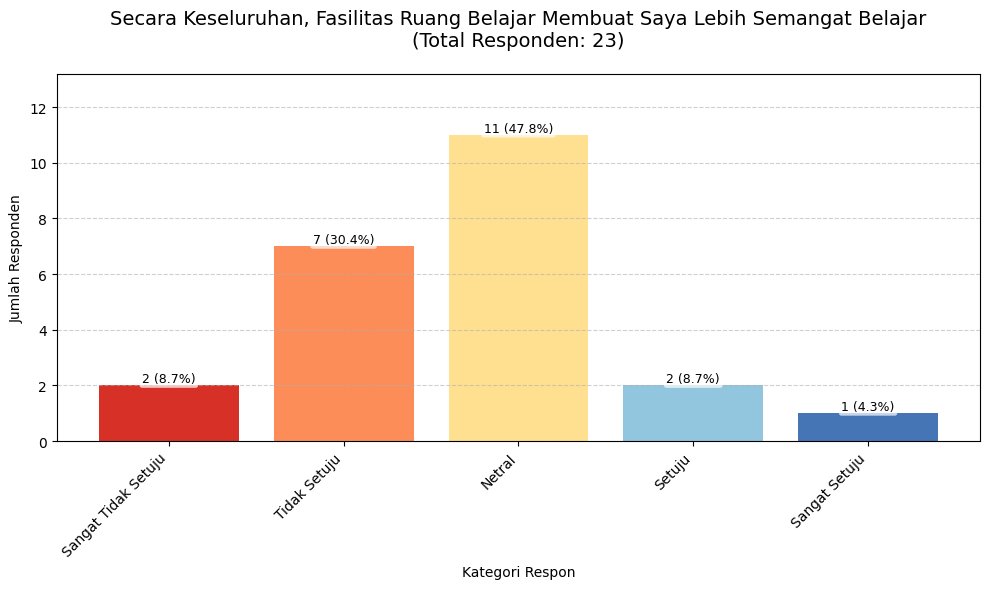

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup7' sudah ada dan terisi seperti yang terlihat di gambar.
# Contoh struktur grup7 (disimulasikan untuk kode ini jika tidak dijalankan bersamaan):
# grup7_data = {
#     'Sangat Tidak Setuju': 2,
#     'Tidak Setuju': 7,
#     'Netral': 11,
#     'Setuju': 2,
#     'Sangat Setuju': 1
# }
# grup7 = pd.Series(grup7_data, name='Secara Keseluruhan, Fasilitas Ruang Belajar Membuat Saya Lebih Semangat Belajar')
# grup7.index.name = 'category'
# Akhir dari bagian simulasi Series 'grup7'.

# 1. Ekstrak data counts dari Series 'grup7'
counts_series = grup7 # Menggunakan variabel 'grup7' langsung

# Nama pertanyaan dari Series 'grup7' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Bar Chart (Vertikal)
# Urutan kategori untuk plotting di sumbu X (dari skor 1 ke 5)
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna yang KONSISTEN dengan visualisasi sebelumnya
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Bar Chart (Vertikal)
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat bar chart vertikal
# `x` adalah kategori, `height` adalah nilai count
bars = ax.bar(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di atas setiap bar
for bar in bars:
    height = bar.get_height() # Tinggi bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (height / total_responden) * 100
    # Selalu tampilkan label, jika height 0, tampilkan 0 (0.0%)
    label_text = f'{int(height)} ({pct:.1f}%)' if height > 0 else '0 (0.0%)'
    ax.text(bar.get_x() + bar.get_width()/2, height,
            label_text,
            ha='center', va='bottom', fontsize=9, color='black',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Kategori Respon', fontsize=10)
ax.set_ylabel('Jumlah Responden', fontsize=10)

# Menyesuaikan rotasi label sumbu X jika terlalu panjang
# Rotasi 45 derajat agar label tidak bertumpuk
plt.xticks(rotation=45, ha='right')

# Tambahkan grid horizontal (opsional)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu Y agar label di atas bar tidak terpotong
ax.set_ylim(0, max(counts_ordered) * 1.2) # Tambah 20% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

#soal 8 :Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen

In [ ]:
soal8=filter_only_fastek.iloc[:,[1,13]]
soal8

,No.,"Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen"
0,1,5
1,2,2
2,3,5
3,4,3
4,5,5
5,6,5
6,7,5
7,8,2
8,9,2
9,10,4


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal8['category']=pd.cut(soal8['Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen'],bins=bins_edge,include_lowest=True,labels=category)
soal8.head(30)

/tmp/ipython-input-37-3230492944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal8['category']=pd.cut(soal8['Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen'],bins=bins_edge,include_lowest=True,labels=category)


,No.,"Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen",category
0,1,5,Sangat Setuju
1,2,2,Tidak Setuju
2,3,5,Sangat Setuju
3,4,3,Netral
4,5,5,Sangat Setuju
5,6,5,Sangat Setuju
6,7,5,Sangat Setuju
7,8,2,Tidak Setuju
8,9,2,Tidak Setuju
9,10,4,Setuju


In [ ]:
grup8=soal8.groupby('category')['Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen'].count()
grup8.head()

/tmp/ipython-input-38-815111268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup8=soal8.groupby('category')['Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen'].count()


,"Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen"
category,
Sangat Tidak Setuju,0
Tidak Setuju,3
Netral,7
Setuju,5
Sangat Setuju,8


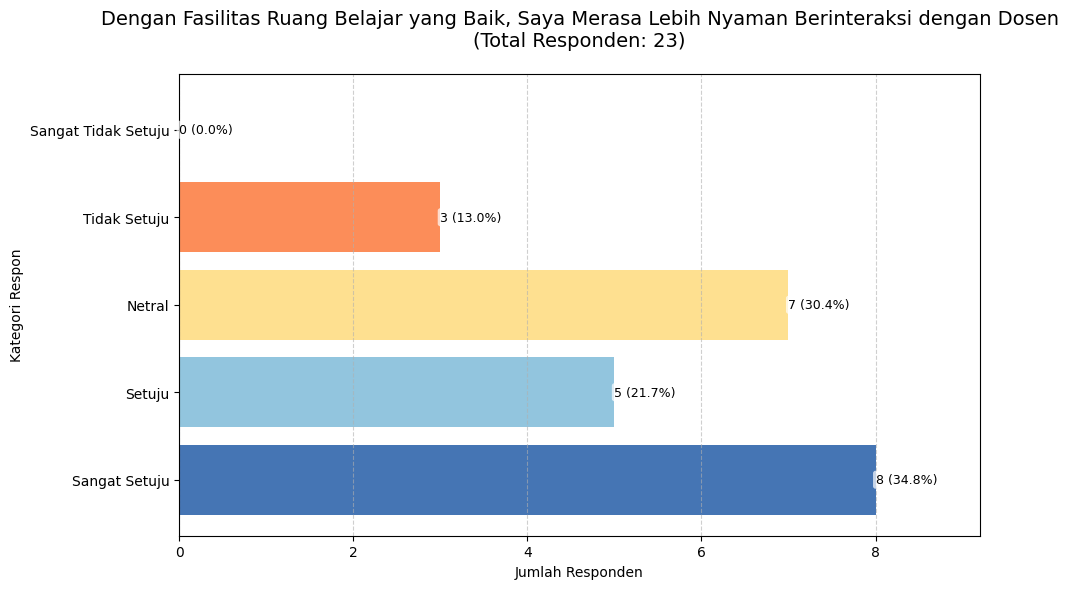

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup8' sudah ada dan terisi seperti yang terlihat di gambar.
# Contoh struktur grup8 (disimulasikan untuk kode ini jika tidak dijalankan bersamaan):
# grup8_data = {
#     'Sangat Tidak Setuju': 0,
#     'Tidak Setuju': 3,
#     'Netral': 7,
#     'Setuju': 5,
#     'Sangat Setuju': 8
# }
# grup8 = pd.Series(grup8_data, name='Dengan Fasilitas Ruang Belajar yang Baik, Saya Merasa Lebih Nyaman Berinteraksi dengan Dosen')
# grup8.index.name = 'category'
# Akhir dari bagian simulasi Series 'grup8'.

# 1. Ekstrak data counts dari Series 'grup8'
counts_series = grup8 # Menggunakan variabel 'grup8' langsung

# Nama pertanyaan dari Series 'grup8' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Horizontal Bar Chart
# Urutan kategori untuk plotting di sumbu Y (dari skor 1 ke 5)
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna yang KONSISTEN dengan visualisasi sebelumnya
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat horizontal bar chart
# `y` adalah posisi kategori, `width` adalah panjang bar (count)
# `align='center'` menempatkan label kategori di tengah bar
bars = ax.barh(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di setiap bar
for bar in bars:
    width = bar.get_width() # Lebar bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (width / total_responden) * 100
    # Selalu tampilkan label, jika width 0, tampilkan 0 (0.0%)
    label_text = f'{int(width)} ({pct:.1f}%)' if width > 0 else '0 (0.0%)'
    ax.text(width, bar.get_y() + bar.get_height()/2,
            label_text,
            va='center', ha='left', fontsize=9, color='black',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Jumlah Responden', fontsize=10)
ax.set_ylabel('Kategori Respon', fontsize=10)

# Invert Y-axis agar kategori pertama (Sangat Tidak Setuju) berada di atas
ax.invert_yaxis()

# Tambahkan grid vertikal (opsional, karena bar horizontal)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu X agar label tidak terpotong
ax.set_xlim(0, max(counts_ordered) * 1.15) # Tambah 15% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

# soal 9 :Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai

In [ ]:
soal9=filter_only_fastek.iloc[:,[1,14]]
soal9

,No.,Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai
0,1,5
1,2,2
2,3,5
3,4,3
4,5,5
5,6,5
6,7,2
7,8,2
8,9,2
9,10,4


In [ ]:
#binning sesuai kriteria
bins_edge=[0,1,2,3,4,5]
category=['Sangat Tidak Setuju','Tidak Setuju','Netral','Setuju','Sangat Setuju']
soal9['category']=pd.cut(soal9['Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai'],bins=bins_edge,include_lowest=True,labels=category)
soal9.head(30)

/tmp/ipython-input-41-788635251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soal9['category']=pd.cut(soal9['Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai'],bins=bins_edge,include_lowest=True,labels=category)


,No.,Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai,category
0,1,5,Sangat Setuju
1,2,2,Tidak Setuju
2,3,5,Sangat Setuju
3,4,3,Netral
4,5,5,Sangat Setuju
5,6,5,Sangat Setuju
6,7,2,Tidak Setuju
7,8,2,Tidak Setuju
8,9,2,Tidak Setuju
9,10,4,Setuju


In [ ]:
grup9=soal9.groupby('category')['Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai'].count()
grup9.head()

/tmp/ipython-input-42-725345805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grup9=soal9.groupby('category')['Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai'].count()


,Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai
category,
Sangat Tidak Setuju,0
Tidak Setuju,5
Netral,6
Setuju,3
Sangat Setuju,9


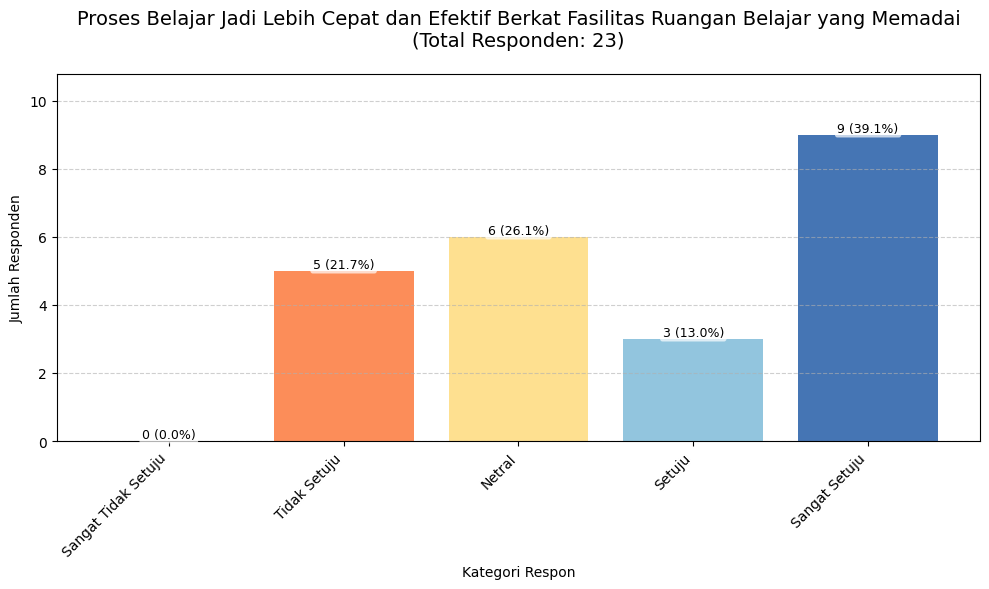

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ASUMSI: Series 'grup9' sudah ada dan terisi seperti yang terlihat di gambar sebelumnya.
# Contoh struktur grup9 (disimulasikan untuk kode ini jika tidak dijalankan bersamaan):
# grup9_data = {
#     'Sangat Tidak Setuju': 0,
#     'Tidak Setuju': 5,
#     'Netral': 6,
#     'Setuju': 3,
#     'Sangat Setuju': 9
# }
# grup9 = pd.Series(grup9_data, name='Proses Belajar Jadi Lebih Cepat dan Efektif Berkat Fasilitas Ruangan Belajar yang Memadai')
# grup9.index.name = 'category'
# Akhir dari bagian simulasi Series 'grup9'.

# 1. Ekstrak data counts dari Series 'grup9'
counts_series = grup9 # Menggunakan variabel 'grup9' langsung

# Nama pertanyaan dari Series 'grup9' (akan digunakan sebagai judul grafik)
question_title = counts_series.name

total_responden = counts_series.sum()

# 2. Persiapan untuk Visualisasi Bar Chart (Vertikal)
# Urutan kategori untuk plotting di sumbu X (dari skor 1 ke 5)
category_order_for_plot = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']

# Ambil count sesuai urutan yang diinginkan
counts_ordered = counts_series.reindex(category_order_for_plot)

# Hitung persentase untuk setiap kategori
percentages_ordered = counts_ordered / total_responden * 100

# Definisikan warna yang KONSISTEN dengan visualisasi sebelumnya
colors = {
    'Sangat Tidak Setuju': '#d73027',  # Merah Tua
    'Tidak Setuju': '#fc8d59',       # Oranye-Merah Muda
    'Netral': '#fee090',            # Kuning Muda/Gading
    'Setuju': '#92c5de',            # Biru Muda
    'Sangat Setuju': '#4575b4'      # Biru Tua
}
# Pastikan urutan warna sesuai dengan urutan kategori plotting
bar_colors = [colors[cat] for cat in category_order_for_plot]

# 3. Membuat Plot Menggunakan Matplotlib Bar Chart (Vertikal)
fig, ax = plt.subplots(figsize=(10, 6)) # Ukuran figure

# Membuat bar chart vertikal
# `x` adalah kategori, `height` adalah nilai count
bars = ax.bar(category_order_for_plot, counts_ordered, color=bar_colors)

# Menambahkan label nilai (count dan persentase) di atas setiap bar
for bar in bars:
    height = bar.get_height() # Tinggi bar (yaitu count)
    # Hitung persentase untuk bar ini
    pct = (height / total_responden) * 100
    # Selalu tampilkan label, jika height 0, tampilkan 0 (0.0%)
    label_text = f'{int(height)} ({pct:.1f}%)' if height > 0 else '0 (0.0%)'
    ax.text(bar.get_x() + bar.get_width()/2, height,
            label_text,
            ha='center', va='bottom', fontsize=9, color='black',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Kategori Respon', fontsize=10)
ax.set_ylabel('Jumlah Responden', fontsize=10)

# Menyesuaikan rotasi label sumbu X jika terlalu panjang
# Rotasi 45 derajat agar label tidak bertumpuk
plt.xticks(rotation=45, ha='right')

# Tambahkan grid horizontal (opsional)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu Y agar label di atas bar tidak terpotong
ax.set_ylim(0, max(counts_ordered) * 1.2) # Tambah 20% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

#soal10 :Karena Jendela Terbuka (Tanpa Gorden), Apakah dapat Memengaruhi Proses Belajar?, Jika Iya Jelaskan!

ESSAI

In [ ]:
soal10=filter_only_fastek.iloc[:,[1,15]]
soal10

,No.,"Karena Jendela Terbuka (Tanpa Gorden), Apakah dapat Memengaruhi Proses Belajar?, Jika Iya Jelaskan!"
0,1,Terkadang ia
1,2,Bisa karena jika menggunakan proyektor cahaya ...
2,3,Tidak berpengaruh
3,4,Mungkin boleh dipertimbangkan menggunakan gord...
4,5,Iya karena terlalu banyak cahaya dari luar seh...
5,6,"iya, karena kadang panas atau pun silau"
6,7,Tidak
7,8,"Sangat mempengaruhi karena kalau siang silau, ..."
8,9,iya karna silau sinar matahari
9,10,"iya, layar proyektor jadi ga keliatan"


karena bersifat string/kalimat, sehingga  dengan cara manual

iya :13
terkadang :4
tidak : 6

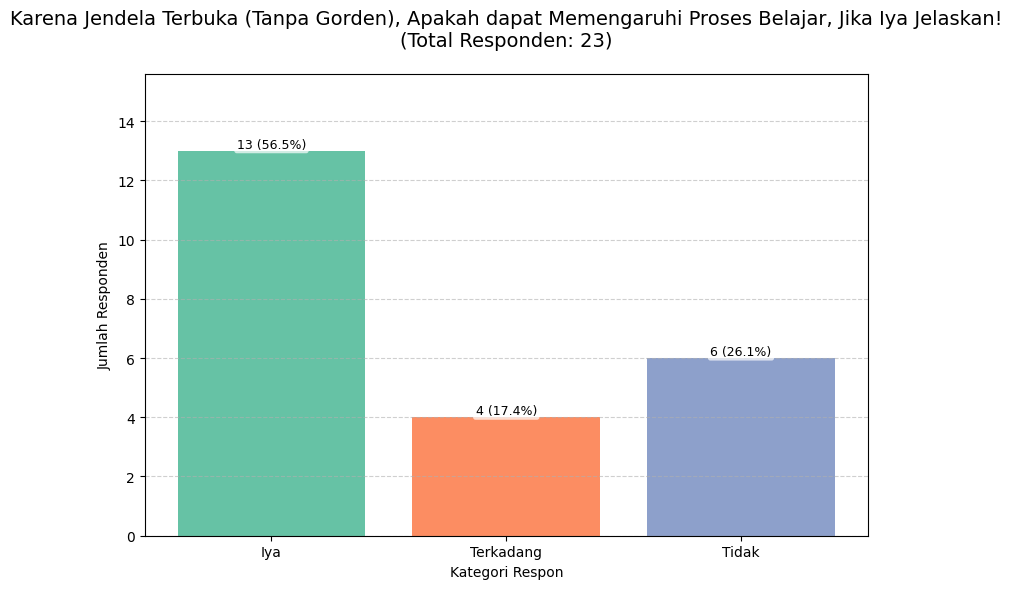

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Membuat DataFrame dari data yang Anda berikan
data = {
    'category': ['Iya', 'Terkadang', 'Tidak'],
    'count': [13, 4, 6]
}
df = pd.DataFrame(data)

# Nama pertanyaan (akan digunakan sebagai judul grafik)
question_title = 'Karena Jendela Terbuka (Tanpa Gorden), Apakah dapat Memengaruhi Proses Belajar, Jika Iya Jelaskan!'

total_responden = df['count'].sum()

# Hitung persentase untuk setiap kategori
df['percentage'] = (df['count'] / total_responden) * 100

# 2. Persiapan untuk Visualisasi Bar Chart (Vertikal)
# Urutan kategori untuk plotting di sumbu X
category_order = ['Iya', 'Terkadang', 'Tidak']
# Pastikan urutan DataFrame sesuai dengan urutan kategori yang diinginkan
df_ordered = df.set_index('category').reindex(category_order).reset_index()

# Definisikan warna untuk setiap kategori
# Kita bisa menggunakan palet warna yang berbeda karena ini bukan skala Likert yang setuju/tidak setuju
colors = {
    'Iya': '#66c2a5',      # Hijau (untuk "Iya")
    'Terkadang': '#fc8d62', # Oranye (untuk "Terkadang")
    'Tidak': '#8da0cb'     # Ungu/Biru (untuk "Tidak")
}
bar_colors = [colors[cat] for cat in df_ordered['category']]

# 3. Membuat Plot Menggunakan Matplotlib Bar Chart (Vertikal)
fig, ax = plt.subplots(figsize=(8, 6)) # Ukuran figure

# Membuat bar chart vertikal
# `x` adalah kategori, `height` adalah nilai count
bars = ax.bar(df_ordered['category'], df_ordered['count'], color=bar_colors)

# Menambahkan label nilai (count dan persentase) di atas setiap bar
for bar in bars:
    height = bar.get_height() # Tinggi bar (yaitu count)
    pct = (height / total_responden) * 100
    label_text = f'{int(height)} ({pct:.1f}%)'
    ax.text(bar.get_x() + bar.get_width()/2, height,
            label_text,
            ha='center', va='bottom', fontsize=9, color='black',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Kategori Respon', fontsize=10)
ax.set_ylabel('Jumlah Responden', fontsize=10)

# Tambahkan grid horizontal (opsional)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu Y agar label di atas bar tidak terpotong
ax.set_ylim(0, max(df_ordered['count']) * 1.2) # Tambah 20% dari nilai maksimum

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

# soal 11 :Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!

In [ ]:
soal11=filter_only_fastek.iloc[:,[1,17]]
soal11

,No.,"Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!"
0,1,Iya wifinya sangat tidak lancar
1,2,ngelag
2,3,Aga sedikit susah masuk wifi dan koneksi tidak...
3,4,Untuk fasilitas Wi-Fi itu sebenarnya sudah bai...
4,5,Terkadang wifi sulit diakses karena jaringan y...
5,6,iyaa sangat lelet
6,7,"Ada,setiap hari wifi selalu susah diakses apal..."
7,8,Wi-Fi kalau dikelas bawah tidak bisa tersambung
8,9,wifi lelet dan tidak bisa di pakai di gedung a
9,10,"ada, kadang bisa dipakai (lancar), kadang lemo..."


In [ ]:
soal11['Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!'].value_counts()

,count
"Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!",
Iya wifinya sangat tidak lancar,1
ngelag,1
Aga sedikit susah masuk wifi dan koneksi tidak stabil,1
"Untuk fasilitas Wi-Fi itu sebenarnya sudah baik kalau dipakai nya pas jam enam pagi atau setengah tujuh pagi karena saat itu mahasiswa/mahasiswi belum banyak yang datang ke kampus alhasil Wi-Fi lancar tapi ketika setelah jam tujuh lewat Wi-Fi jadi lemot karena mahasiswa dan mahasiswi sudah banyak berdatangan ke kampus yang membuat Wi-Fi itu lemot, Dan saat libur juga Wi-Fi lancar saja meskipun tidak selancar itu. Mungkin bisa ditambah juga titik-titik Wi-Fi baru untuk mencakup keseluruhan area kampus.",1
Terkadang wifi sulit diakses karena jaringan yang tidak lancar,1
iyaa sangat lelet,1
"Ada,setiap hari wifi selalu susah diakses apalagi saat proses pembelajaran..jika mahasiswa tidak ada kuota pasti memakai wifi namun sinyal selalu",1
Wi-Fi kalau dikelas bawah tidak bisa tersambung,1
wifi lelet dan tidak bisa di pakai di gedung a,1


ya : 22
tidak : 1

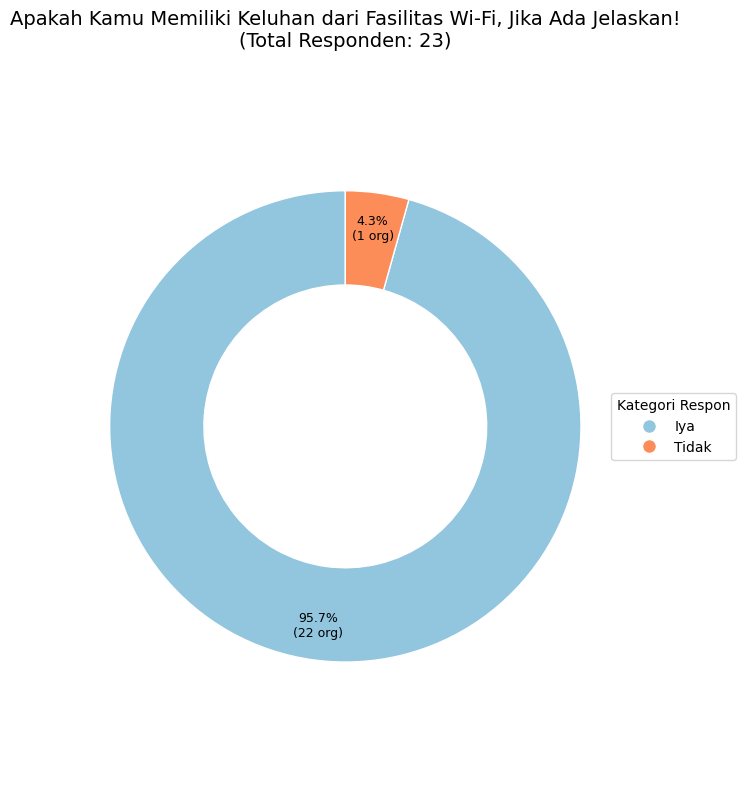

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Membuat DataFrame dari data yang Anda berikan (data yang sudah diralat)
data = {
    'category': ['Iya', 'Tidak'],
    'count': [22, 1]  # Data yang sudah diralat: Iya 22, Tidak 1
}
df = pd.DataFrame(data)

# Nama pertanyaan (akan digunakan sebagai judul grafik)
question_title = 'Apakah Kamu Memiliki Keluhan dari Fasilitas Wi-Fi, Jika Ada Jelaskan!'

total_responden = df['count'].sum() # Menghitung total dari data yang diralat (22 + 1 = 23)

# Hitung persentase untuk setiap kategori
df['percentage'] = (df['count'] / total_responden) * 100

# 2. Persiapan untuk Visualisasi Pie Chart
# Urutan kategori untuk pie chart (sesuai urutan logis atau dominan)
category_order = ['Iya', 'Tidak']

# Ambil count dan persentase sesuai urutan yang diinginkan
counts_ordered = df.set_index('category').reindex(category_order)['count']
percentages_ordered = df.set_index('category').reindex(category_order)['percentage']

# Definisikan warna untuk setiap kategori (konsisten dengan skema setuju/tidak setuju sebelumnya)
colors = {
    'Iya': '#92c5de',  # Biru Muda (mirip "Setuju")
    'Tidak': '#fc8d59' # Oranye-Merah Muda (mirip "Tidak Setuju")
}
pie_colors = [colors[cat] for cat in category_order]

# Fungsi kustom untuk autopct agar bisa menampilkan jumlah responden juga
def custom_autopct_format(pct, allvals_counts):
    absolute_value = int(round(pct/100.*total_responden))
    if absolute_value > 0:
        return f'{pct:.1f}%\n({absolute_value} org)'
    return '' # Tidak menampilkan label di dalam irisan jika jumlahnya 0

# Definisikan label untuk legend (lebih detail)
legend_labels_map = {
    'Iya': 'Iya',
    'Tidak': 'Tidak'
}

# 3. Membuat Plot Menggunakan Matplotlib Pie Chart
fig, ax = plt.subplots(figsize=(8, 8)) # Ukuran figure yang sesuai untuk pie chart

# Membuat pie chart
wedges, texts, autotexts = ax.pie(
    percentages_ordered,
    colors=pie_colors,
    autopct=lambda pct: custom_autopct_format(pct, counts_ordered),
    pctdistance=0.85,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w') # Membuat donut chart
)

# Sesuaikan warna teks persentase agar mudah dibaca di dalam irisan
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)

# Atur judul grafik
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)

# Pastikan pie chart berbentuk lingkaran sempurna
ax.axis('equal')

# Tambahkan legend secara terpisah
legend_handles = []
legend_labels_list = []
for cat_name in category_order:
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor=colors[cat_name], markersize=10))
    legend_labels_list.append(legend_labels_map[cat_name])

ax.legend(handles=legend_handles, labels=legend_labels_list, loc='center left', bbox_to_anchor=(1, 0.5), title="Kategori Respon")

# Sesuaikan layout agar semua elemen (termasuk legend) terlihat dengan baik
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Tampilkan plot
plt.show()

#soal 12 :Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!

In [ ]:
soal12=filter_only_fastek.iloc[:,[1,18]]
soal12

,No.,"Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!"
0,1,"Kurang pencahayaan, perlu kipas/ac karna terka..."
1,2,"panas, kursi dan meja goyang"
2,3,Pencahayaan pada setiap proyektor berbeda beda
3,4,Mungkin keluhan dari fasilitas ruang belajar p...
4,5,"Jendela tidak ada gorden, lalu papan tulis yan..."
5,6,"bagian wifi, sangat lelet. pendingin ruangan j..."
6,7,"Ada, Untuk ruangan harap diperiksa proyektor b..."
7,8,Kursinya buat tidak nyaman karena terlalu semp...
8,9,iya meja kursi yang sudah tidak layak pakai
9,10,"spidol yang kadang kadang suka abis isinya, la..."


In [ ]:
soal12['Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!'].value_counts()

,count
"Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!",
"Kurang pencahayaan, perlu kipas/ac karna terkadang panas",1
"panas, kursi dan meja goyang",1
Pencahayaan pada setiap proyektor berbeda beda,1
Mungkin keluhan dari fasilitas ruang belajar perlu adanya kesediaan spidol yang isi/ada supaya dosen juga tidak perlu membawa spidol ataupun meminta spidol kepada mahasiswa/mahasiswi untuk meminjam spidol.,1
"Jendela tidak ada gorden, lalu papan tulis yang tampak kotor sehingga materi yang di berikan tidak jelas, lalu ditangga jika menuju kelas lantai 2 sangat tercium sehingga menggangu pernafasan sebaiknya dilarang merokok didalam ruangan bawah tangga!",1
"bagian wifi, sangat lelet. pendingin ruangan juga tidak ada jadi sangat panas",1
"Ada, Untuk ruangan harap diperiksa proyektor berfungsi atau tidak karena setiap pembelajaran selalu ada halangan dari proyektornya\n",1
"Kursinya buat tidak nyaman karena terlalu sempit, apalagi di siang hari, pengap jadinya kursinya kecil, dempet""an. Terus panas karena ada kelas yang tidak ada kipas anginnya",1
iya meja kursi yang sudah tidak layak pakai,1


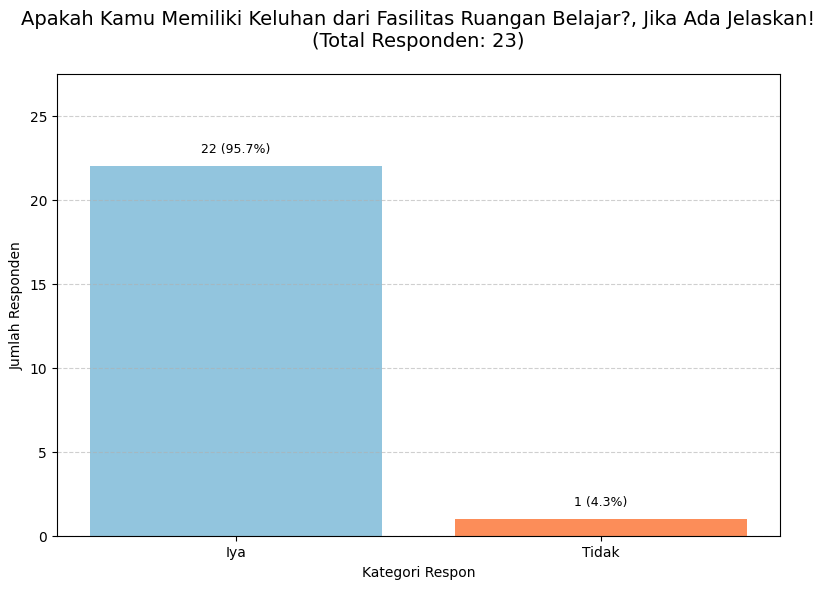

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Membuat DataFrame dari data yang Anda berikan
data = {
    'category': ['Iya', 'Tidak'],
    'count': [22, 1]
}
df = pd.DataFrame(data)

# Nama pertanyaan (akan digunakan sebagai judul grafik)
question_title = 'Apakah Kamu Memiliki Keluhan dari Fasilitas Ruangan Belajar?, Jika Ada Jelaskan!'

total_responden = df['count'].sum() # Menghitung total dari data yang diberikan (22 + 1 = 23)

# Hitung persentase untuk setiap kategori
df['percentage'] = (df['count'] / total_responden) * 100

# 2. Persiapan untuk Visualisasi Bar Chart (Vertikal)
# Urutan kategori untuk plotting di sumbu X
category_order = ['Iya', 'Tidak']
# Pastikan urutan DataFrame sesuai dengan urutan kategori yang diinginkan
df_ordered = df.set_index('category').reindex(category_order).reset_index()

# Definisikan warna untuk setiap kategori (konsisten dengan skema setuju/tidak setuju sebelumnya)
colors = {
    'Iya': '#92c5de',  # Biru Muda (mirip "Setuju")
    'Tidak': '#fc8d59' # Oranye-Merah Muda (mirip "Tidak Setuju")
}
bar_colors = [colors[cat] for cat in df_ordered['category']]

# 3. Membuat Plot Menggunakan Matplotlib Bar Chart (Vertikal)
fig, ax = plt.subplots(figsize=(8, 6)) # Ukuran figure

# Membuat bar chart vertikal
# `x` adalah kategori, `height` adalah nilai count
bars = ax.bar(df_ordered['category'], df_ordered['count'], color=bar_colors)

# Menambahkan label nilai (count dan persentase) di atas setiap bar
for bar in bars:
    height = bar.get_height() # Tinggi bar (yaitu count)
    pct = (height / total_responden) * 100
    # Pastikan label tetap terlihat meskipun count kecil
    if height > 0:
        label_text = f'{int(height)} ({pct:.1f}%)'
        # Sesuaikan posisi teks untuk bar yang sangat pendek
        text_y_position = height + (max(df_ordered['count']) * 0.03) # Sedikit di atas bar
        ax.text(bar.get_x() + bar.get_width()/2, text_y_position,
                label_text,
                ha='center', va='bottom', fontsize=9, color='black',
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7)) # Background label agar terbaca
    else:
        # Jika height 0, mungkin tidak perlu label
        pass

# 4. Pengaturan Sumbu, Judul, dan Label
ax.set_title(f'{question_title}\n(Total Responden: {total_responden})', fontsize=14, pad=20)
ax.set_xlabel('Kategori Respon', fontsize=10)
ax.set_ylabel('Jumlah Responden', fontsize=10)

# Tambahkan grid horizontal (opsional)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Sesuaikan batas sumbu Y agar label di atas bar tidak terpotong
ax.set_ylim(0, max(df_ordered['count']) * 1.25) # Tambah 25% dari nilai maksimum untuk mengakomodasi label

# Sesuaikan layout agar semua elemen terlihat jelas
plt.tight_layout()

# Tampilkan plot
plt.show()

# soal 13 : Apa Saran Anda Terkait Peningkatan Fasilitas Kampus untuk Mendukung Proses Belajar Mengajar?

In [ ]:
soal12=filter_only_fastek.iloc[:,[1,16]]
soal12

,No.,Apa Saran Anda Terkait Peningkatan Fasilitas Kampus untuk Mendukung Proses Belajar Mengajar?
0,1,Masih bannyak yanng harus di perbaki seperti w...
1,2,Mungkin bisa dari kursi dan meja dibagusin dulu
2,3,Fasilitas harus merata pada setiap kelas
3,4,Yah mungkin aspirasi dari kami bisa direalisas...
4,5,Sarannya agar terdapat gorden dikelas dan papa...
5,6,wifi tolong di tingkatkan
6,7,Tingkatkan Wifi disetiap Gedung terutama Faste...
7,8,"Kursinya dibuat lebih nyaman lagi, tolong kipa..."
8,9,semoga pimpinan peka oleh hal ini karna tanpa ...
9,10,"jendela di pasang gorden, saran wifi ditambah ..."


In [ ]:
soal12['Apa Saran Anda Terkait Peningkatan Fasilitas Kampus untuk Mendukung Proses Belajar Mengajar?'].value_counts()

,count
Apa Saran Anda Terkait Peningkatan Fasilitas Kampus untuk Mendukung Proses Belajar Mengajar?,
"Masih bannyak yanng harus di perbaki seperti wifi,keterangan pencahayaan, pendingin ruangan",1
Mungkin bisa dari kursi dan meja dibagusin dulu,1
Fasilitas harus merata pada setiap kelas,1
"Yah mungkin aspirasi dari kami bisa direalisasikan secara baik dan benar, Agar kegiatan belajar mengajar efektif dan efisien. Dan sangat menyenangkan bagi mahasiswa dan mahasiswi IKOPIN Universiti.",1
"Sarannya agar terdapat gorden dikelas dan papan tulis yang harus bersih dan lebih lebar, lalu untuk fastek kelas bawah itu jarak meja dengan papan tulis sangat jauh sehingga bagi saya penderita minus dan silinder tidak tampak jelas walaupun duduk dikursi depan dan ditambah papan tulis yang kotor sehingga menambah kesulitan dalam membaca materi yang dipaparkan",1
wifi tolong di tingkatkan,1
"Tingkatkan Wifi disetiap Gedung terutama Fastek , dan Periksa Proyeksi berfungsi atau tidak",1
"Kursinya dibuat lebih nyaman lagi, tolong kipas anginnya ditambah, apalagi ada kelas yang tidak punya kipas angin, proyektor juga kalau bisa, dan Wi-Fi lebih diperlancar lagi, karena di lab juga jaringan sering jelek, dan yang terakhir tempat sampah tolong pak Bu lebih diperbanyak lagi, karena sangat sulit untuk membuang sampah di kampus",1
semoga pimpinan peka oleh hal ini karna tanpa sarana dan prasarana yang memadai proses belajar mengajar kurang berjalan dengan baik,1
